<a href="https://colab.research.google.com/github/trisharaj11/Climate_Impact_on_Crop_Productivity/blob/main/01_EDA_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
crop_df = pd.read_csv('Crops_data (1).csv')
rain_df = pd.read_csv('rainfall (1).csv')
temp_df = pd.read_csv('temperature (1).csv')


In [4]:
print("Crop columns:")
print(crop_df.columns)

print("\nRainfall columns:")
print(rain_df.columns)

print("\nTemperature columns:")
print(temp_df.columns)


Crop columns:
Index(['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name',
       'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)',
       'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)',
       'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)',
       'KHARIF SORGHUM AREA (1000 ha)',
       'KHARIF SORGHUM PRODUCTION (1000 tons)',
       'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM AREA (1000 ha)',
       'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)',
       'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)',
       'SORGHUM YIELD (Kg per ha)', 'PEARL MILLET AREA (1000 ha)',
       'PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)',
       'MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)',
       'MAIZE YIELD (Kg per ha)', 'FINGER MILLET AREA (1000 ha)',
       'FINGER MILLET PRODUCTION (1000 tons)',
       'FINGER MILLET YIELD (Kg per ha)', 'BARLEY AREA (1000 ha)',
       'BARLEY PRODUCTION (1000 to

In [5]:
crop_df.columns = crop_df.columns.str.strip()
rain_df.columns = rain_df.columns.str.strip()
temp_df.columns = temp_df.columns.str.strip()


In [7]:
# Crop data already has 'Year' → no change needed

# Rainfall
rain_df.rename(columns={'YEAR': 'Year'}, inplace=True)

# Temperature
temp_df.rename(columns={'YEAR': 'Year'}, inplace=True)


In [8]:
crop_df = crop_df[(crop_df['Year'] >= 2010) & (crop_df['Year'] <= 2017)]
rain_df = rain_df[(rain_df['Year'] >= 2010) & (rain_df['Year'] <= 2017)]
temp_df = temp_df[(temp_df['Year'] >= 2010) & (temp_df['Year'] <= 2017)]


In [9]:
# Strip spaces
crop_df.columns = crop_df.columns.str.strip()
rain_df.columns = rain_df.columns.str.strip()
temp_df.columns = temp_df.columns.str.strip()

# Rename YEAR → Year
if 'YEAR' in rain_df.columns:
    rain_df.rename(columns={'YEAR': 'Year'}, inplace=True)

if 'YEAR' in temp_df.columns:
    temp_df.rename(columns={'YEAR': 'Year'}, inplace=True)

# Confirm
print("Crop:", crop_df.columns)
print("Rain:", rain_df.columns)
print("Temp:", temp_df.columns)


Crop: Index(['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name',
       'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)',
       'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)',
       'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)',
       'KHARIF SORGHUM AREA (1000 ha)',
       'KHARIF SORGHUM PRODUCTION (1000 tons)',
       'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM AREA (1000 ha)',
       'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)',
       'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)',
       'SORGHUM YIELD (Kg per ha)', 'PEARL MILLET AREA (1000 ha)',
       'PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)',
       'MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)',
       'MAIZE YIELD (Kg per ha)', 'FINGER MILLET AREA (1000 ha)',
       'FINGER MILLET PRODUCTION (1000 tons)',
       'FINGER MILLET YIELD (Kg per ha)', 'BARLEY AREA (1000 ha)',
       'BARLEY PRODUCTION (1000 tons)', 'B

In [10]:
# Select only required columns
yield_df = crop_df[
    ['State Name', 'Year',
     'RICE YIELD (Kg per ha)',
     'WHEAT YIELD (Kg per ha)']
].copy()


In [11]:
yield_df = yield_df.melt(
    id_vars=['State Name', 'Year'],
    var_name='Crop',
    value_name='Yield'
)

# Clean crop names
yield_df['Crop'] = yield_df['Crop'].apply(
    lambda x: 'Rice' if 'RICE' in x else 'Wheat'
)

yield_df.head()


,State Name,Year,Crop,Yield
0,Chhattisgarh,2010,Rice,1695.77
1,Chhattisgarh,2011,Rice,1756.23
2,Chhattisgarh,2012,Rice,1900.97
3,Chhattisgarh,2013,Rice,1581.86
4,Chhattisgarh,2014,Rice,1729.89


In [12]:
rain_clean = rain_df[['Year', 'ANN']].copy()
rain_clean.rename(columns={'ANN': 'Rainfall'}, inplace=True)


In [13]:
temp_clean = temp_df[['Year', 'ANNUAL']].copy()
temp_clean.rename(columns={'ANNUAL': 'Temperature'}, inplace=True)


In [14]:
merged = yield_df.merge(rain_clean, on='Year', how='inner')
merged = merged.merge(temp_clean, on='Year', how='inner')

merged.head()


,State Name,Year,Crop,Yield,Rainfall,Temperature
0,Chhattisgarh,2010,Rice,1695.77,1215.5,25.13
1,Chhattisgarh,2011,Rice,1756.23,1116.3,24.67
2,Chhattisgarh,2012,Rice,1900.97,1054.7,24.69
3,Chhattisgarh,2013,Rice,1581.86,1092.5,24.82
4,Chhattisgarh,2014,Rice,1729.89,1045.2,24.73


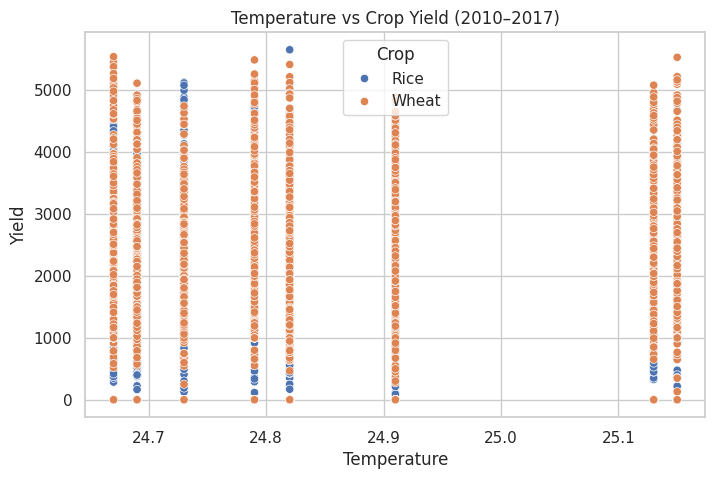

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(data=merged, x='Temperature', y='Yield', hue='Crop')
plt.title('Temperature vs Crop Yield (2010–2017)')
plt.show()


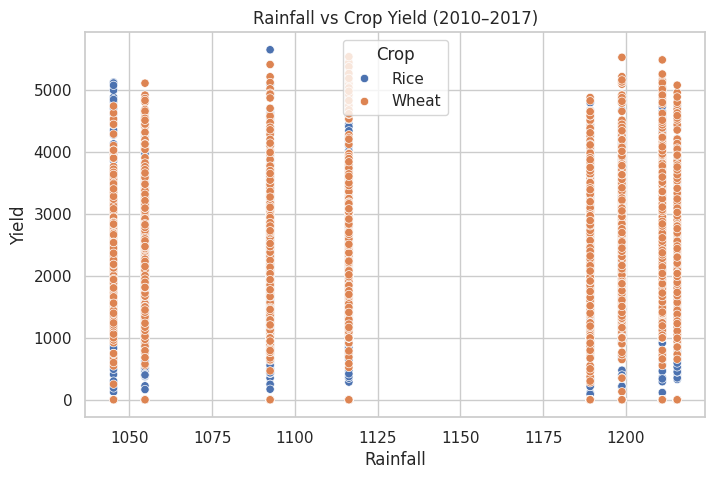

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=merged, x='Rainfall', y='Yield', hue='Crop')
plt.title('Rainfall vs Crop Yield (2010–2017)')
plt.show()


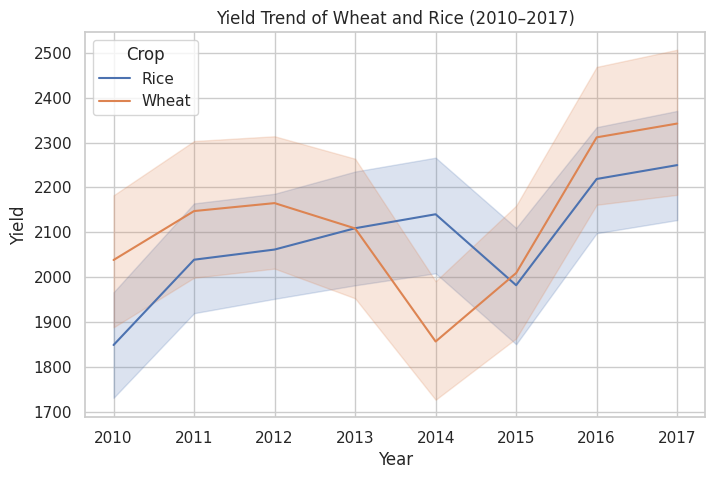

In [17]:
plt.figure(figsize=(8,5))
sns.lineplot(data=merged, x='Year', y='Yield', hue='Crop')
plt.title('Yield Trend of Wheat and Rice (2010–2017)')
plt.show()


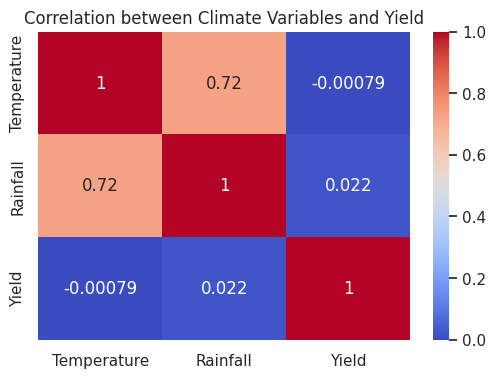

In [18]:
corr = merged[['Temperature', 'Rainfall', 'Yield']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Climate Variables and Yield')
plt.show()


In [19]:
merged.to_csv('merged_data_2010_2017.csv', index=False)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [21]:
national_avg = merged.groupby(['Year', 'Crop'], as_index=False)[
    ['Yield', 'Rainfall', 'Temperature']
].mean()


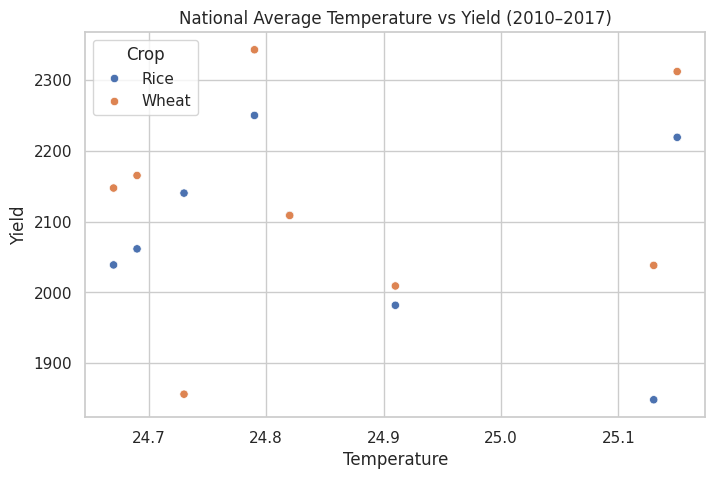

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=national_avg,
    x='Temperature',
    y='Yield',
    hue='Crop'
)
plt.title('National Average Temperature vs Yield (2010–2017)')
plt.show()
